# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data Loading

In [ ]:
path = "data.csv"
data = pd.read_csv(path)

# Drop ID column if present
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)

# Drop unnamed columns (if any)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

print("First 5 rows:")
print(data.head())
print("\nData types:")
print(data.dtypes)


First 5 rows:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38  

# Data Pre-Processing

In [4]:
# Handling missing values separately for numeric and categorical
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Encoding target variable
data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])  # M=1, B=0

# Features & Target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Scaling numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Exploratory Data Analysis


Descriptive Statistics:
                         count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.36020

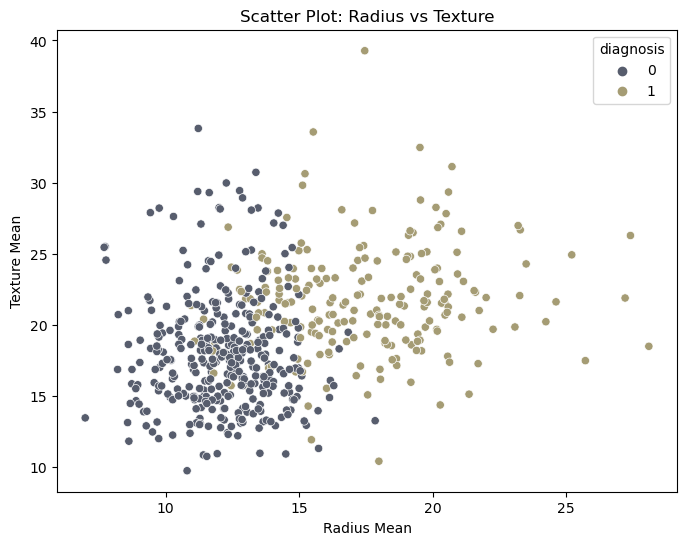

In [5]:
print("\nDescriptive Statistics:")
print(data.describe().T)

# Scatter plot radius vs texture
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['radius_mean'], y=data['texture_mean'], hue=y, palette='cividis')
plt.title("Scatter Plot: Radius vs Texture")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.show()

# Data Modeling

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Logistic Regression ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[71  1]
 [ 2 40]]

=== Decision Tree ===
Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
 [[68  4]
 [ 4 38]]

=== Random Forest ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72

# Reflection

In [8]:

# What Worked?
# Preprocessing strategy handled numeric (median) and categorical (mode) values effectively,
#   preventing data loss.
# Logistic Regression provided a solid baseline and confirmed class separability.
# Random Forest gave the best accuracy and robustness, capturing feature interactions well.

# What Didn’t?
# Decision Tree tended to overfit and did not generalize as effectively as Random Forest.
# Strong correlations among features reduced interpretability of the model.
# Scaling was necessary, so original feature magnitudes could not be compared directly.

# Most Insightful Visualization
# The scatter plot of radius_mean vs texture_mean was the most revealing,
#   as it showed a clear separation between malignant and benign cases.
